### EDA: Incidencia de Covid19 por estado en Estados Unidos (2020 - 2021)

In [2]:
#importamos las librerías necesarias
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Hola mundo")

Hola mundo


In [3]:
#hacemos la petición a la API con la librería requests para solicitar y guardar los datos
url = "https://api.covidtracking.com/v1/states/daily.json"
response = requests.get(url)
if response.status_code != 200:
    print("error")
data = response.json()
df = pd.DataFrame(data)

In [4]:
#mostramos las primeras 5 líneas del dataframe
#para verificar que se ha importado correctamente
df.head()

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,dataQualityGrade,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20210307,AK,56886.0,NaN,NaN,NaN,totalTestsViral,1731628.0,33.0,1293.0,...,None,0,0,dc4bccd4bb885349d7e94d6fed058e285d4be164,0,0,0,0,0,
1,20210307,AL,499819.0,107742.0,1931711.0,NaN,totalTestsPeopleViral,2323788.0,494.0,45976.0,...,None,-1,0,997207b430824ea40b8eb8506c19a93e07bc972e,0,0,0,0,0,
2,20210307,AR,324818.0,69092.0,2480716.0,NaN,totalTestsViral,2736442.0,335.0,14926.0,...,None,22,11,50921aeefba3e30d31623aa495b47fb2ecc72fae,0,0,0,0,0,
3,20210307,AS,0.0,NaN,2140.0,NaN,totalTestsViral,2140.0,NaN,NaN,...,None,0,0,f77912d0b80d579fbb6202fa1a90554fc4dc1443,0,0,0,0,0,
4,20210307,AZ,826454.0,56519.0,3073010.0,NaN,totalTestsViral,7908105.0,963.0,57907.0,...,None,5,44,0437a7a96f4471666f775e63e86923eb5cbd8cdf,0,0,0,0,0,


In [5]:
#verificamos el tamaño del dataframe
df.shape

(20780, 56)

El dataframe tiene 56 columnas (variables) y 20780 filas (observaciones)

In [6]:
#ejecutamos el método .info para tener una visión general de las columnas, los datos no nulos y los tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20780 entries, 0 to 20779
Data columns (total 56 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   date                         20780 non-null  int64  
 1   state                        20780 non-null  object 
 2   positive                     20592 non-null  float64
 3   probableCases                9271 non-null   float64
 4   negative                     13290 non-null  float64
 5   pending                      2138 non-null   float64
 6   totalTestResultsSource       20780 non-null  object 
 7   totalTestResults             20614 non-null  float64
 8   hospitalizedCurrently        17339 non-null  float64
 9   hospitalizedCumulative       12382 non-null  float64
 10  inIcuCurrently               11636 non-null  float64
 11  inIcuCumulative              3789 non-null   float64
 12  onVentilatorCurrently        9126 non-null   float64
 13  onVentilatorCumu

In [7]:
#contamos la cantidad de variables de cada tipo
df.dtypes.value_counts()

float64    33
int64      13
object     10
Name: count, dtype: int64

Según los tipos de dato del dataframe, vemos que hay 46 variables numéricas y 10 categóricas

In [8]:
#este método devuelve True si hay nulos en la columna
#y devuelve False si no los hay
df.isnull().any()

date                           False
state                          False
positive                        True
probableCases                   True
negative                        True
pending                         True
totalTestResultsSource         False
totalTestResults                True
hospitalizedCurrently           True
hospitalizedCumulative          True
inIcuCurrently                  True
inIcuCumulative                 True
onVentilatorCurrently           True
onVentilatorCumulative          True
recovered                       True
lastUpdateEt                    True
dateModified                    True
checkTimeEt                     True
death                           True
hospitalized                    True
hospitalizedDischarged          True
dateChecked                     True
totalTestsViral                 True
positiveTestsViral              True
negativeTestsViral              True
positiveCasesViral              True
deathConfirmed                  True
d

In [9]:
#cuantificamos la cantidad de datos nulos por cada columna (axis=0 indica que la suma debe realizarse a lo largo del eje vertical, es decir por columnas)
df.isnull().sum(axis = 0)

date                               0
state                              0
positive                         188
probableCases                  11509
negative                        7490
pending                        18642
totalTestResultsSource             0
totalTestResults                 166
hospitalizedCurrently           3441
hospitalizedCumulative          8398
inIcuCurrently                  9144
inIcuCumulative                16991
onVentilatorCurrently          11654
onVentilatorCumulative         19490
recovered                       8777
lastUpdateEt                     616
dateModified                     616
checkTimeEt                      616
death                            850
hospitalized                    8398
hospitalizedDischarged         17710
dateChecked                      616
totalTestsViral                 6264
positiveTestsViral             11822
negativeTestsViral             15756
positiveCasesViral              6534
deathConfirmed                 11358
d

/home/coder01/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


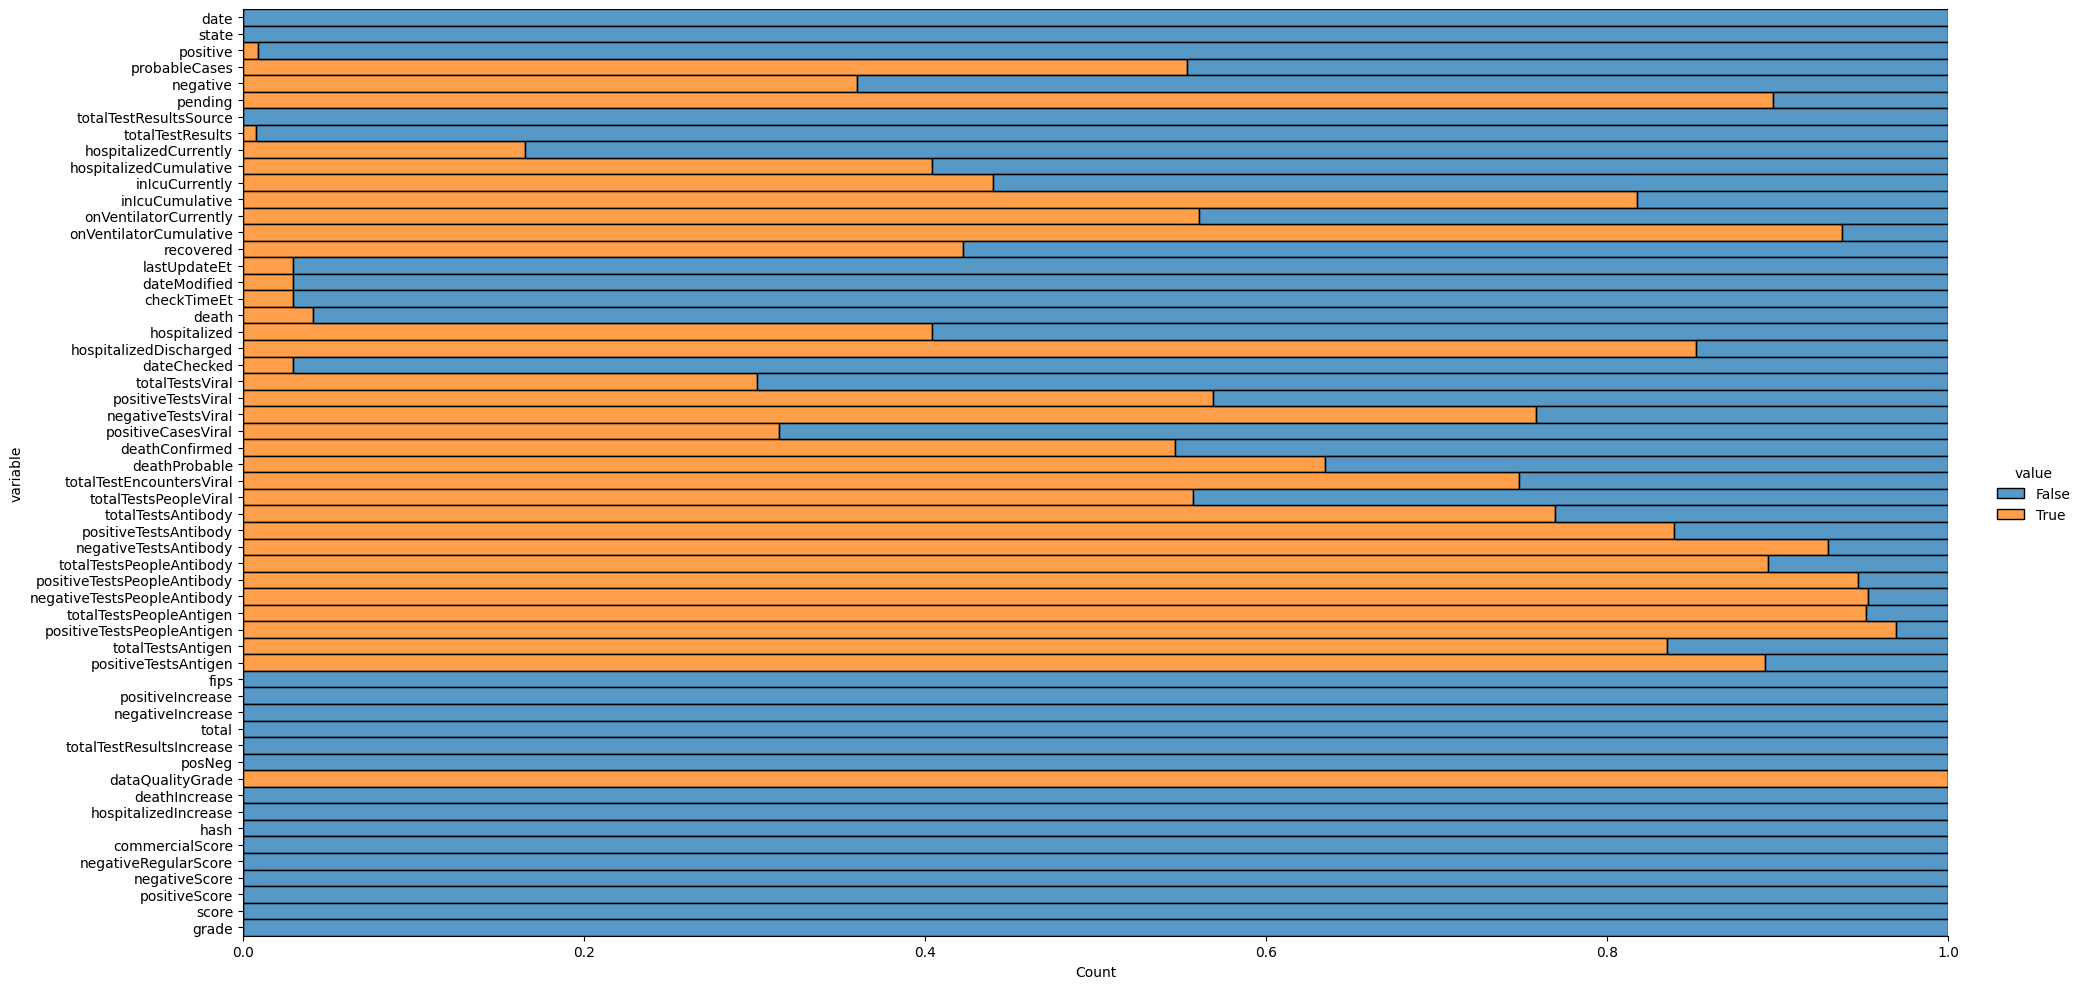

In [10]:
#determinamos la proporción de nulos por variable
df.isnull().melt().pipe(lambda df:(sns.displot(data=df, y="variable", hue="value", multiple="fill", height=10, aspect=2)))

Vemos que las columnas relacionadas con los tests (tanto Antibody como Antigen) tienen un porcentaje de nulos bastante alto (casi del 80%). Muy posiblemente convenga eliminar estas columnas del dataframe para nuestro análisis. Las columnas "pending", "onVentilatorCumulative", "hospitalizedDischarged", "negativeTestViral" y "dataQualityGrade" también tienen un porcentaje cercano o superior al 80% de nulos.

In [11]:
#¿qué pasaría si descartamos los nulos?
df.dropna().shape

(0, 56)

Vemos que no podemos descartar los registros que contengan nulos en el dataframe original porque nos quedaríamos sin datos. Será más conveniente eliminar las columnas que tengan un porcentaje de nulos superior al 80% y quedarnos sólo con algunas variables más interesantes.

In [12]:
#determinamos las variables categóricas y numéricas de interés (reducimos la lista para hacer más sencillo el análisis)
categoricas = ["date", "state"]
numericas = ["positive", "totalTestResults", "death", "positiveIncrease", 
             "negativeIncrease", "totalTestResultsIncrease", "deathIncrease", 
             "hospitalizedIncrease"]

In [13]:
df[categoricas].head()

,date,state
0,20210307,AK
1,20210307,AL
2,20210307,AR
3,20210307,AS
4,20210307,AZ


In [14]:
df[numericas].head()

,positive,totalTestResults,death,positiveIncrease,negativeIncrease,totalTestResultsIncrease,deathIncrease,hospitalizedIncrease
0,56886.0,1731628.0,305.0,0,0,0,0,0
1,499819.0,2323788.0,10148.0,408,2087,2347,-1,0
2,324818.0,2736442.0,5319.0,165,3267,3380,22,11
3,0.0,2140.0,0.0,0,0,0,0,0
4,826454.0,7908105.0,16328.0,1335,13678,45110,5,44


In [15]:
#filtramos el dataset original para que incluya únicamente las variables de interés y sea más simple
df_simple = df.loc[:, categoricas + numericas]
df_simple.head()

,date,state,positive,totalTestResults,death,positiveIncrease,negativeIncrease,totalTestResultsIncrease,deathIncrease,hospitalizedIncrease
0,20210307,AK,56886.0,1731628.0,305.0,0,0,0,0,0
1,20210307,AL,499819.0,2323788.0,10148.0,408,2087,2347,-1,0
2,20210307,AR,324818.0,2736442.0,5319.0,165,3267,3380,22,11
3,20210307,AS,0.0,2140.0,0.0,0,0,0,0,0
4,20210307,AZ,826454.0,7908105.0,16328.0,1335,13678,45110,5,44


In [16]:
#cambiamos el tipo de dato de las fechas para trabajar con este campo más adelante
df_simple["date"] = pd.to_datetime(df_simple["date"], format="%Y%m%d")
df_simple.sort_values(by="date", ascending=False, inplace=True)
df_simple.head()

,date,state,positive,totalTestResults,death,positiveIncrease,negativeIncrease,totalTestResultsIncrease,deathIncrease,hospitalizedIncrease
0,2021-03-07,AK,56886.0,1731628.0,305.0,0,0,0,0,0
29,2021-03-07,MT,100914.0,1104488.0,1381.0,72,0,3132,0,1
31,2021-03-07,ND,100391.0,1425146.0,1478.0,34,-109,679,0,2
32,2021-03-07,NE,203026.0,2421684.0,2113.0,373,542,1,0,8
33,2021-03-07,NH,76861.0,1497185.0,1184.0,166,396,15697,3,4


In [17]:
#comprobamos el tamaño del nuevo dataframe
df_cleaned = df_simple.dropna()
df_cleaned.shape

(19858, 10)

El nuevo dataframe **simple** contiene casi el mismo número de filas, pero hemos reducido el número de columnas a 10

<Axes: >

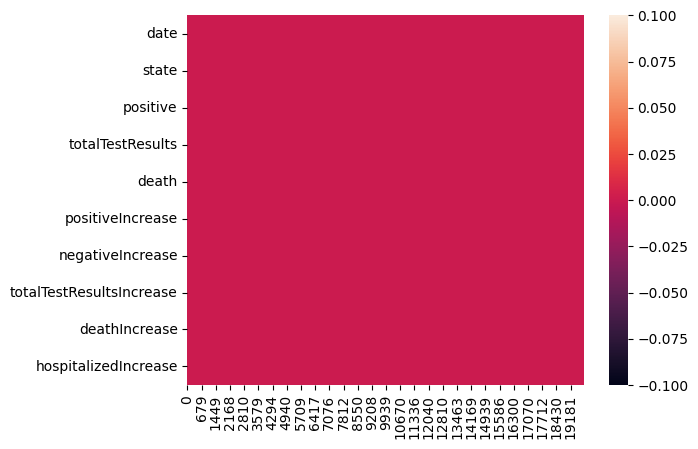

In [18]:
#graficamos nuevamente en blanco los valores nulos y en negro los no-nulos
df_cleaned.isnull().transpose().pipe(lambda df_cleaned: sns.heatmap(data=df_cleaned))

Podemos ver que no hay datos nulos después de la eliminación de las columnas y de usar el método dropna(). Guardamos el dataset limpio en una nueva variable llamada df_cleaned.

In [19]:
for col in categoricas:
    print(f"Column name: {col}")
    print(df_cleaned[col].value_counts())
    print()

Column name: date
date
2021-03-07    56
2020-07-28    56
2020-07-20    56
2020-07-21    56
2020-07-22    56
              ..
2020-03-01     1
2020-02-29     1
2020-02-28     1
2020-02-27     1
2020-02-26     1
Name: count, Length: 376, dtype: int64

Column name: state
state
WA    376
NJ    368
NV    368
MI    363
DE    362
FL    362
CA    361
GA    360
ND    360
AZ    360
CO    360
KY    359
MO    359
KS    359
IN    359
WV    358
LA    358
NY    358
UT    358
VA    358
AL    358
SC    357
NC    356
IL    356
AK    356
TX    356
PA    355
MP    355
MA    355
SD    355
NE    354
OK    354
CT    354
DC    354
VT    353
MS    353
OH    353
WI    353
MN    352
AR    351
ID    351
PR    351
GU    351
NH    350
TN    349
MD    349
NM    349
IA    348
ME    346
WY    346
MT    345
RI    344
OR    343
AS    342
HI    341
VI    337
Name: count, dtype: int64



In [20]:
df_cleaned[numericas].describe()

,positive,totalTestResults,death,positiveIncrease,negativeIncrease,totalTestResultsIncrease,deathIncrease,hospitalizedIncrease
count,1.985800e+04,1.985800e+04,19858.000000,19858.000000,19858.000000,19858.000000,19858.00000,19858.000000
mean,1.712594e+05,2.270170e+06,3695.562745,1447.835482,3753.448232,18317.123477,25.94078,39.086565
std,3.311961e+05,4.499228e+06,6288.825065,3078.001660,11817.112253,34141.629982,61.30094,212.858625
min,0.000000e+00,0.000000e+00,0.000000,-7757.000000,-968686.000000,-130545.000000,-201.00000,-12257.000000
25%,7.482500e+03,1.401315e+05,167.000000,94.000000,0.000000,1655.000000,1.00000,0.000000
50%,5.131850e+04,7.222520e+05,1119.000000,487.000000,308.000000,6733.500000,7.00000,1.000000
75%,1.862452e+05,2.379632e+06,4405.500000,1421.000000,4271.750000,20107.000000,25.00000,40.000000
max,3.501394e+06,4.964601e+07,54124.000000,71734.000000,212974.000000,473076.000000,2559.00000,16373.000000


In [21]:
# Cambiamos las columnas positive, death y totalTestResults a un tipo de dato entero
df_cleaned["positive"] = df_cleaned["positive"].astype(int)
df_cleaned["death"] = df_cleaned["death"].astype(int)
df_cleaned["totalTestResults"] = df_cleaned["totalTestResults"].astype(int)
#df_cleaned = df_cleaned.set_index('state')
df_cleaned.head()
# Se realiza un chequeo para verificar los datos
df_cleaned.dtypes.value_counts()

/tmp/ipykernel_6106/1207975961.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["positive"] = df_cleaned["positive"].astype(int)
/tmp/ipykernel_6106/1207975961.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["death"] = df_cleaned["death"].astype(int)
/tmp/ipykernel_6106/1207975961.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

int64             8
datetime64[ns]    1
object            1
Name: count, dtype: int64

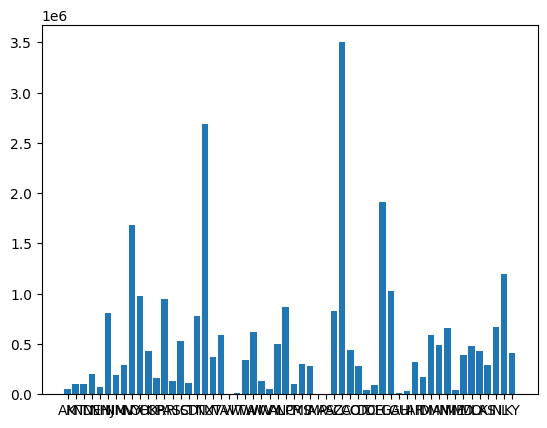

<Figure size 800x600 with 0 Axes>

In [22]:
# Gráfico relación estado - positivo
plt.bar(df_cleaned["state"], df_cleaned["positive"])
plt.figure(figsize=(8, 6))
plt.show()


In [23]:
df_cleaned.head()

,date,state,positive,totalTestResults,death,positiveIncrease,negativeIncrease,totalTestResultsIncrease,deathIncrease,hospitalizedIncrease
0,2021-03-07,AK,56886,1731628,305,0,0,0,0,0
29,2021-03-07,MT,100914,1104488,1381,72,0,3132,0,1
31,2021-03-07,ND,100391,1425146,1478,34,-109,679,0,2
32,2021-03-07,NE,203026,2421684,2113,373,542,1,0,8
33,2021-03-07,NH,76861,1497185,1184,166,396,15697,3,4


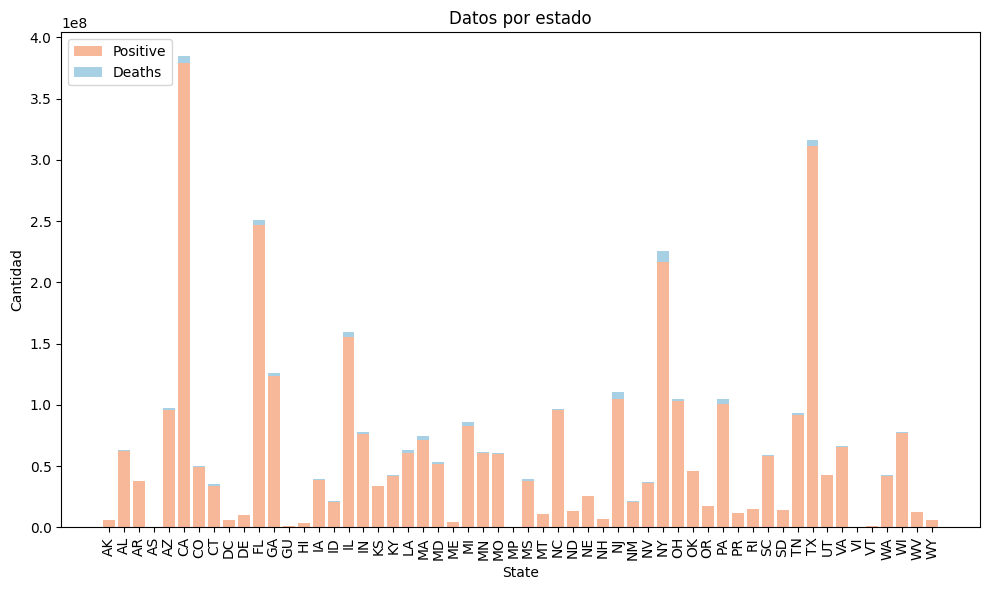

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que tienes tus datos en un DataFrame llamado 'df'
# Por ejemplo:
# df = pd.DataFrame({'state': ['California', 'Texas', 'New York', 'California', 'Texas'],
#                    'positive': [1000, 2000, 1500, 800, 1200],
#                    'death': [50, 80, 30, 40, 60]})

# Agrupar los datos por estado y sumar las cantidades de 'positive' y 'death'
grouped_df = df_cleaned.groupby('state').agg({'positive': 'sum', 'death': 'sum'}).reset_index()

# Extraer las columnas que necesitas
states = grouped_df['state']
positive = grouped_df['positive']
deaths = grouped_df['death']

# Colores para las barras
colors = sns.color_palette("RdBu", 2)

# Etiquetas para la leyenda
labels = ["Positive", "Deaths"]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(states, positive, color=colors[0], label=labels[0])
plt.bar(states, deaths, bottom=positive, color=colors[1], label=labels[1])

# Configurar el eje x
plt.xticks(rotation=90)

# Agregar leyenda
plt.legend(loc='upper left')

# Etiquetas de los ejes
plt.xlabel('State')
plt.ylabel('Cantidad')

# Título del gráfico
plt.title('Datos por estado')

# Mostrar el gráfico
plt.tight_layout()
plt.show()



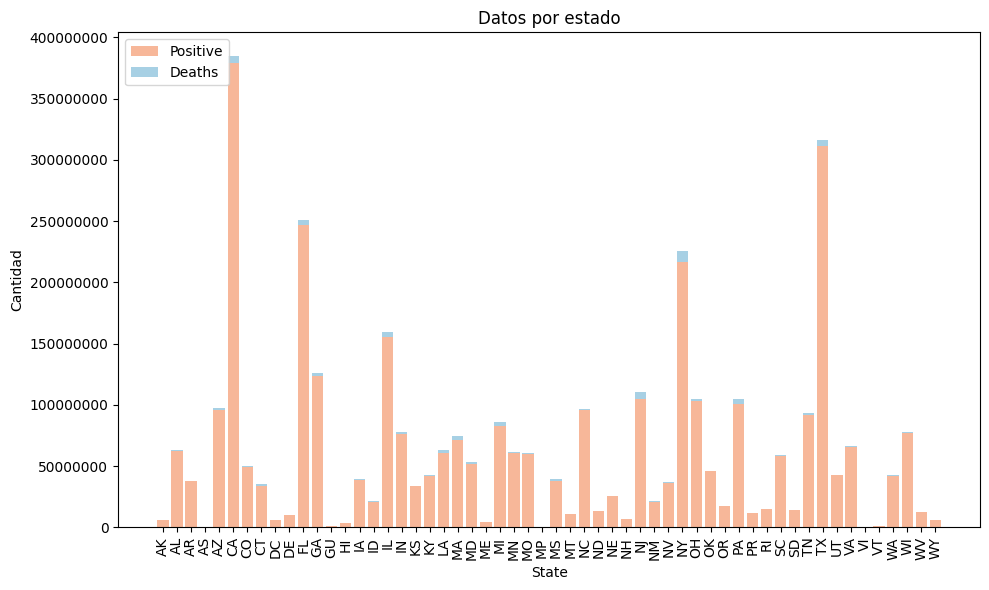

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que tienes tus datos en un DataFrame llamado 'df'
# Por ejemplo:
# df = pd.DataFrame({'state': ['California', 'Texas', 'New York', ...],
#                    'positive': [1000, 2000, 1500, ...],
#                    'death': [50, 80, 30, ...]})

# Agrupar los datos por estado y sumar las cantidades de 'positive' y 'death'
grouped_df = df.groupby('state').agg({'positive': 'sum', 'death': 'sum'}).reset_index()

# Extraer las columnas que necesitas
states = grouped_df['state']
positive = grouped_df['positive']
deaths = grouped_df['death']

# Colores para las barras
colors = sns.color_palette("RdBu", 2)

# Etiquetas para la leyenda
labels = ["Positive", "Deaths"]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(states, positive, color=colors[0], label=labels[0])
plt.bar(states, deaths, bottom=positive, color=colors[1], label=labels[1])

# Configurar el eje x
plt.xticks(rotation=90)

# Agregar leyenda
plt.legend(loc='upper left')

# Etiquetas de los ejes
plt.xlabel('State')
plt.ylabel('Cantidad')

# Título del gráfico
plt.title('Datos por estado')

# Desactivar notación científica en el eje y
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

# Mostrar el gráfico
plt.tight_layout()
plt.show()




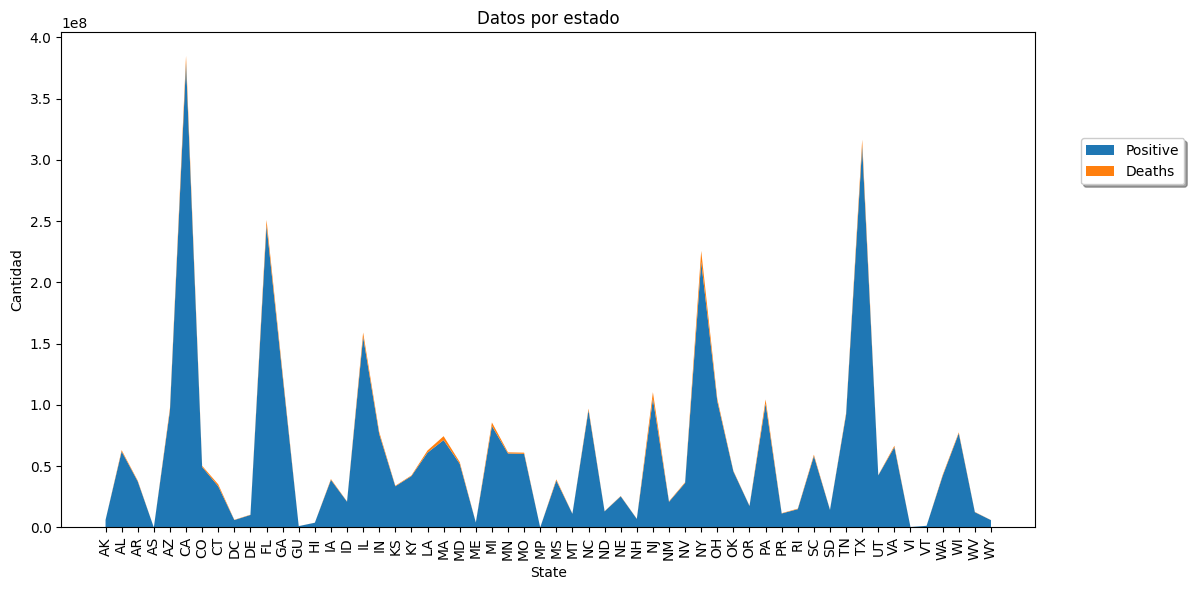

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que tienes tus datos en un DataFrame llamado 'df_cleaned'
# Por ejemplo:
# df_cleaned = pd.DataFrame({'state': ['California', 'Texas', 'New York', 'California', 'Texas'],
#                            'positive': [1000, 2000, 1500, 800, 1200],
#                            'death': [50, 80, 30, 40, 60]})

# Agrupar los datos por estado y sumar las cantidades de 'positive' y 'death'
grouped_df = df_cleaned.groupby('state').agg({'positive': 'sum', 'death': 'sum'}).reset_index()

# Extraer las columnas que necesitas
states = grouped_df['state']
positive = grouped_df['positive']
deaths = grouped_df['death']

# Configurar los colores y etiquetas para las leyendas
colors = sns.color_palette("tab10")
labels = ["Positive", "Deaths"]

# Crear el gráfico de stackplot
plt.figure(figsize=(12, 6))
plt.stackplot(states, positive, deaths, colors=colors, labels=labels)

# Configurar la leyenda
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 0.8), shadow=True, ncol=1)

# Configurar los ticks del eje x y su rotación
plt.xticks(rotation=90)

# Etiquetas de los ejes
plt.xlabel('State')
plt.ylabel('Cantidad')

# Título del gráfico
plt.title('Datos por estado')

# Ajustar automáticamente el espacio para evitar cortar etiquetas
plt.tight_layout()

# Mostrar el gráfico
plt.show()


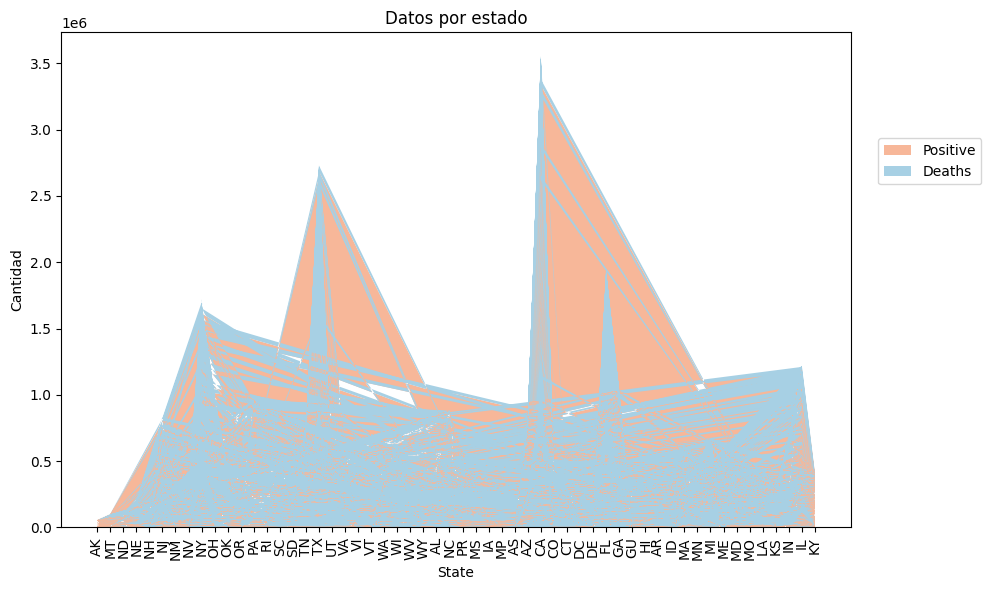

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que tienes tus datos en un DataFrame llamado 'df_cleaned'
# Por ejemplo:
# df_cleaned = pd.DataFrame({'state': ['California', 'Texas', 'New York', 'California', 'Texas'],
#                            'positive': [1000, 2000, 1500, 800, 1200],
#                            'death': [50, 80, 30, 40, 60]})

# Extraer las columnas que necesitas
states = df_cleaned['state']
positive = df_cleaned['positive']
deaths = df_cleaned['death']

# Configurar los colores y etiquetas para las leyendas
colors = sns.color_palette("RdBu", 2)
labels = ["Positive", "Deaths"]

# Crear el gráfico de stackplot
plt.figure(figsize=(10, 6))
plt.stackplot(states, positive, deaths, labels=labels, colors=colors)

# Configurar la leyenda
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 0.8), ncol=1)

# Configurar el eje x
plt.xticks(rotation=90)

# Etiquetas de los ejes
plt.xlabel('State')
plt.ylabel('Cantidad')

# Título del gráfico
plt.title('Datos por estado')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


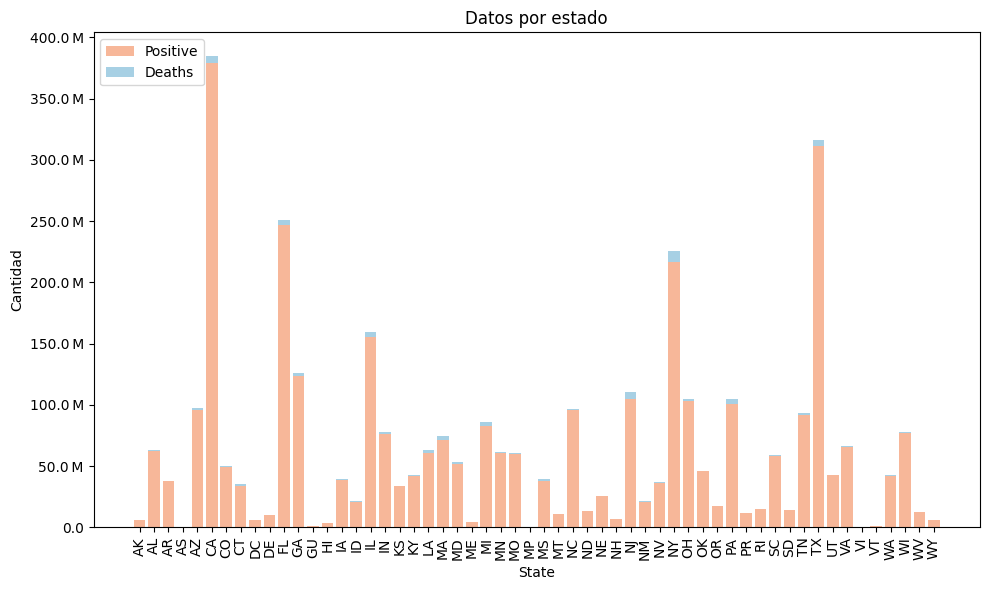

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import EngFormatter

# Supongamos que tienes tus datos en un DataFrame llamado 'df'
# Por ejemplo:
# df = pd.DataFrame({'state': ['California', 'Texas', 'New York', ...],
#                    'positive': [1000000, 2000000, 1500000, ...],
#                    'death': [50000, 80000, 30000, ...]})

# Agrupar los datos por estado y sumar las cantidades de 'positive' y 'death'
grouped_df = df.groupby('state').agg({'positive': 'sum', 'death': 'sum'}).reset_index()

# Extraer las columnas que necesitas
states = grouped_df['state']
positive = grouped_df['positive']
deaths = grouped_df['death']

# Colores para las barras
colors = sns.color_palette("RdBu", 2)

# Etiquetas para la leyenda
labels = ["Positive", "Deaths"]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(states, positive, color=colors[0], label=labels[0])
plt.bar(states, deaths, bottom=positive, color=colors[1], label=labels[1])

# Configurar el eje x
plt.xticks(rotation=90)

# Agregar leyenda
plt.legend(loc='upper left')

# Etiquetas de los ejes
plt.xlabel('State')
plt.ylabel('Cantidad')

# Título del gráfico
plt.title('Datos por estado')

# Configurar el formato del eje y con notación científica abreviada
formatter = EngFormatter(places=1, sep=u"\N{THIN SPACE}")
plt.gca().get_yaxis().set_major_formatter(formatter)

# Mostrar el gráfico
plt.tight_layout()
plt.show()
